In [115]:
import numpy as np
import pandas as pd
import sklearn
import xlrd
import matplotlib.pylab as py
import nltk as nltk
#import textblob as textblob
import matplotlib.pyplot as plt
import spacy as sp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [116]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [117]:
#importing the excell file. make sure it is uploaded in the same folder as the notebook. 

PrimaryEmotion = pd.read_csv('emotion.xls.csv')
PrimaryEmotion

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,emotion,emotion:confidence,emotion_gold,id,idiom_id,sentence
0,731671736,False,finalized,5,6/8/15 16:10,Neutral,0.3333,NaN,1,1,How much of the forecast was genuine and how m...
1,731671737,False,finalized,5,6/12/15 14:33,Neutral,0.3885,NaN,2,2,I did touch them one time you see but of cours...
2,731671738,False,finalized,5,6/8/15 16:10,Neutral,0.3333,NaN,3,3,We find that choice theorists admit that they ...
3,731671739,False,finalized,5,6/8/15 16:30,Neutral,0.3690,NaN,4,4,"Well, here I am with an olive branch."
4,731671740,False,finalized,5,6/8/15 16:30,Neutral,0.5572,NaN,5,5,"Its rudder and fin were both knocked out, and ..."
5,731671741,False,finalized,5,6/12/15 14:27,Anger,0.6250,NaN,6,6,Over my dead body are you arresting him.
6,731671742,False,finalized,5,6/8/15 16:30,Neutral,0.3358,NaN,7,7,"Don't let him pick a fight now, we're almost h..."
7,731671743,False,finalized,5,6/8/15 15:47,Neutral,0.3571,NaN,8,8,He's a good fighter but there are certain poin...
8,731671744,False,finalized,5,6/12/15 14:30,Optimism,0.6115,NaN,10,10,Aggie finally found the cat a good home and fr...
9,731671745,False,finalized,5,6/12/15 14:35,Neutral,0.2083,NaN,12,12,She left the citizens of Riverbank to their sh...


In [118]:
#subsetting the data, we now have a dataframe of just the emotion and the sentences. 

ProjectData = PrimaryEmotion[['emotion','sentence']]
ProjectData.head()

,emotion,sentence
0,Neutral,How much of the forecast was genuine and how m...
1,Neutral,I did touch them one time you see but of cours...
2,Neutral,We find that choice theorists admit that they ...
3,Neutral,"Well, here I am with an olive branch."
4,Neutral,"Its rudder and fin were both knocked out, and ..."


In [119]:
ProjectData.emotion.unique()

array(['Neutral', 'Anger', 'Optimism', 'Disgust', 'Sadness',
       'Anticipation', 'Aggression', 'Submission', 'Love', 'Surprise',
       'Contempt', 'Disapproval', 'Remorse', 'Ambiguous', 'Fear', 'Joy',
       'Awe', 'Trust'], dtype=object)

In [120]:
# In this first step I am changing all the words to lower case. Haven't figured out this error later
ProjectData.loc[:,'sentence'] = ProjectData.loc[:,'sentence'].apply(lambda x: " ".join(x.lower() for x in x.split()))
ProjectData.head()

,emotion,sentence
0,Neutral,how much of the forecast was genuine and how m...
1,Neutral,i did touch them one time you see but of cours...
2,Neutral,we find that choice theorists admit that they ...
3,Neutral,"well, here i am with an olive branch."
4,Neutral,"its rudder and fin were both knocked out, and ..."


In [121]:
# In this line I am removing punctuation.
ProjectData['sentence'] = ProjectData.loc[:,'sentence'].str.replace('[^\w\s]','')
ProjectData.head()

,emotion,sentence
0,Neutral,how much of the forecast was genuine and how m...
1,Neutral,i did touch them one time you see but of cours...
2,Neutral,we find that choice theorists admit that they ...
3,Neutral,well here i am with an olive branch
4,Neutral,its rudder and fin were both knocked out and a...


In [122]:
# Now I remove stop words.
# Note that I used a package that has predefined "stopwords" you can google the package "nltk stopwords list" to see which words are in the list. This is something we could edit to whatever we want. 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords


stop = stopwords.words('english')

ProjectData['sentence'] = ProjectData['sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

ProjectData.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\graci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\graci\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\graci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,emotion,sentence
0,Neutral,much forecast genuine much fixed moot point
1,Neutral,touch one time see course nothing wanted
2,Neutral,find choice theorists admit introduce style mo...
3,Neutral,well olive branch
4,Neutral,rudder fin knocked fourfootlong gash shell mea...


In [123]:
# As we know, several of our sentences contain some numeric values, which doesn't work well with what we are trying to do. So I'm going to change them to their character equilivant. For example, "1975" will become *ninteen seventy five".
# First I am creating a new column which counts how many elements in a sentence are numeric. 

#ProjectData['numerics'] = ProjectData['sentence'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
#ProjectData[['emotion','sentence','numerics']].head()

In [124]:
# This block of code creates a subset of the data which includes each row with a numeric element. As you can see there are over 90 rows. 
#numerics = (ProjectData.loc[ProjectData['numerics'] > 0])
#numerics

In [125]:
#ProjectData['sentence'].replace(to_replace = '1978', value = 'ninteen seventy eight', )

In [126]:
# This block finds the lemma of each word. 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

ProjectData['sentence'] = ProjectData['sentence'].apply(lemmatizer.lemmatize)

ProjectData.head()

,emotion,sentence
0,Neutral,much forecast genuine much fixed moot point
1,Neutral,touch one time see course nothing wanted
2,Neutral,find choice theorists admit introduce style mo...
3,Neutral,well olive branch
4,Neutral,rudder fin knocked fourfootlong gash shell mea...


In [127]:
# Here we tokenize the data "ProjectData"
# Not yet sure how to fix the error...
ProjectData['sentence'] = ProjectData['sentence'].apply(word_tokenize)

In [128]:
# What our dataframe currently looks like. 
ProjectData.head()

,emotion,sentence
0,Neutral,"[much, forecast, genuine, much, fixed, moot, p..."
1,Neutral,"[touch, one, time, see, course, nothing, wanted]"
2,Neutral,"[find, choice, theorists, admit, introduce, st..."
3,Neutral,"[well, olive, branch]"
4,Neutral,"[rudder, fin, knocked, fourfootlong, gash, she..."


In [129]:
Optimism1 = (ProjectData.loc[ProjectData['emotion'] == 'Optimism'])
Optimism1.head()

,emotion,sentence
8,Optimism,"[aggie, finally, found, cat, good, home, day, ..."
10,Optimism,"[must, sink, differences]"
16,Optimism,"[think, need, meeting, get, laid, need, meetin..."
21,Optimism,"[er, weve, got, friends, situation, let, bygon..."
34,Optimism,"[uk, good, books, european, space, agency]"


In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter

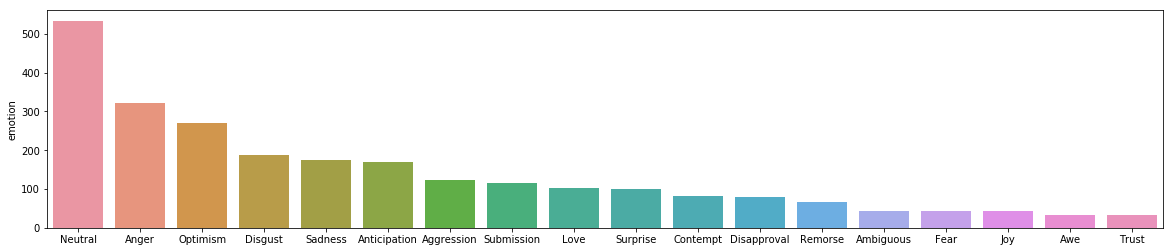

In [139]:
fig = plt.figure(figsize=(20,4))
sns.barplot(x = ProjectData['emotion'].unique(), y=ProjectData['emotion'].value_counts())
plt.show()

NameError: name 'plot' is not defined

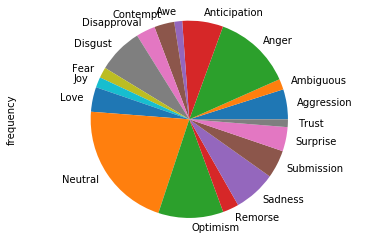

In [144]:
df = pd.DataFrame({'emotion': ProjectData['emotion'].unique(), 'frequency': ProjectData['emotion'].value_counts()})
df.frequency.groupby(df.emotion).sum().plot(kind = 'pie')
plt.axis('equal')
plot.show()

In [132]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ProjectData, test_size=0.33, random_state=42)
print('Emotion:', train['emotion'].iloc[:])
print('Sentence:', train['sentence'].iloc[:])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Emotion: 273     Anticipation
788         Surprise
71           Neutral
2032     Disapproval
1857         Neutral
63           Remorse
394          Sadness
1546             Joy
343          Neutral
1410        Optimism
2051        Optimism
500            Anger
1714           Anger
2509            Fear
677     Anticipation
1055           Trust
1933             Joy
1566             Joy
272        Ambiguous
978      Disapproval
205      Disapproval
733      Disapproval
152      Disapproval
1446        Surprise
557          Neutral
377         Contempt
1453      Aggression
535       Submission
1229             Awe
1211             Awe
            ...     
1806             Joy
975         Contempt
2047         Remorse
1082        Optimism
474             Love
747     Anticipation
2300      Aggression
21          Optimism
459       Aggression
1184           Anger
2324         Neutral
955              Joy
1215         Neutral
2433           Anger
1515        Contempt
2391         Neutral
769 

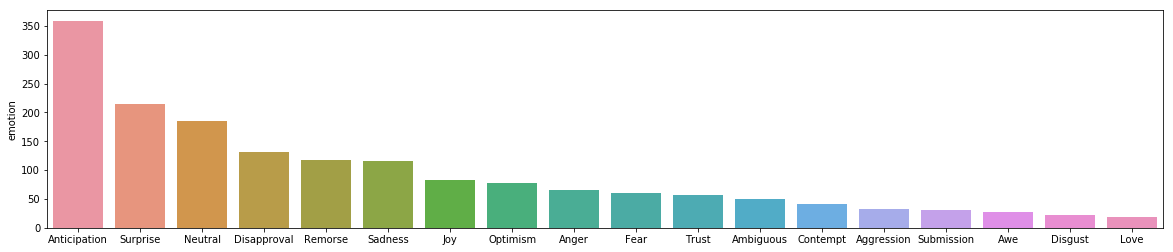

In [133]:
fig = plt.figure(figsize=(20,4))
sns.barplot(x = train['emotion'].unique(), y=train['emotion'].value_counts())
plt.show()

In [134]:
train.head()

,emotion,sentence
273,Anticipation,"[take, easy, way, using, gas, carry, us]"
788,Surprise,"[got, phone, call, blue, mandy, next, morning]"
71,Neutral,"[already, said, could, see, red, green]"
2032,Disapproval,"[admiring, oreilly, recalls, definitely, screw..."
1857,Neutral,"[teething, problems]"


In [35]:
#Optimism2 = ProjectData.loc[['Optimism', 'Anticipation', 'Joy'], 'emotion'])
#Optimism2.head()

In [36]:
#OptimismWords = Optimism1['sentence']

In [ ]:
#Optimism1.emotion.unique()

In [38]:
import spacy
nlp = spacy.load('en')
doc = nlp('Hello     World!')
for token in doc:
    print('"' + token.text + '"')
 

"Hello"
"    "
"World"
"!"


In [ ]:
# Start with one review:
#text = "preface. Changes for seventh edition. in the preparation of this seventh edition, our goal has remained steadfast: to produce an outstanding text in mathematical statistics. in this new edition, we have added examples and exercises to help clarify the exposition. for the smae reason, we have moved some material forward. for example, we moved the discussion on some properties of linear combinations of random variables from chapter 4 to chapter 2."

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [ ]:

#Optimism1 = (ProjectData.loc[ProjectData['emotion'] == 'Optimism'])
#Optimism1.head()

In [ ]:
#ProjectData.loc[8,:]
#Optimism1 = (ProjectData.loc[ProjectData['emotion'] == 'Optimism'])
#Optimism1.head()
#WordCloud.generate(str(Optimism1['sentence']))

#text = Optimism1['sentence']

# Create and generate a word cloud image:
#wordcloud = WordCloud.generate(text)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()